In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PLUME_function import *
import seaborn as sns
from scipy import stats
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Data Importing

In [4]:
Xtrain,Ytrain,Xtest,VarNames = DataImporting()
Object = "NO2"
Hour = "1" 

In [5]:
X_train_train = pd.read_csv('sample data/X_train_train.csv')
X_train_test = pd.read_csv('sample data/X_train_test.csv')
Y_train_train = pd.read_csv('sample data/Y_train_train.csv')
Y_train_test = pd.read_csv('sample data/X_train_test.csv')

# I. Classification des Variables.

* #### variables de type date : isxxxx, hour, day, month, date
* #### variables météo :  cloudCover, dewPoint, humidity, precipIntensity, precipProbability, pressure, sunPower, temperature
* #### variables de type vent : windBearingcos, windBearingsin, windSpeed
* #### variables de concentration : NO2, O3, PM2_5, PM10

# II. Préparation des Données
On crée les ensembles d'apprentissage X_train_train, Y_train_train et les ensembles de test X_train_test, Y_train_test.

On va respecter la structure de X_train et X_test.

In [ ]:
date_train_list = sorted(list(set([DataSample(Xtrain,"NO2",keep_date= True).date.values[i].split(' ')[0] for i in range(4031)])))

In [ ]:
start = '2015-03-08'
end = '2015-04-05'
date_train_list.index(end) - date_train_list.index(start)

Alors, on va prendre 21 jours pour l'apprendissage et 8 jours pour le test.

In [ ]:
date_train_end = [date_train_list[i] for i in range(20,len(date_train_list),29)]
date_train_start = [date_train_list[i] for i in range(0,len(date_train_list),29)]
print date_train_start
print date_train_end
date_test_end = [date_train_list[i] for i in range(28,len(date_train_list),29)]
date_test_start = [date_train_list[i] for i in range(21,len(date_train_list),29)]
print date_test_start
print date_test_end

In [ ]:
date_pds =[Xtrain.date.values[i].split(' ')[0] for i in range(len(Xtrain))]
bloc = 0
def TestDataSpliter(data,bloc,type = "train"):
    train_index = [i for i in range(len(Xtrain)) if date_pds[i]>=date_train_start[bloc] and date_pds[i]<=date_train_end[bloc] ]
    test_index = [i for i in range(len(Xtrain)) if date_pds[i]>=date_test_start[bloc] and date_pds[i]<=date_test_end[bloc] ]
    if type == "train":
        return data.iloc[train_index,:]
    if type == "test":
        return data.iloc[test_index,:]
TestDataSpliter(Xtrain,bloc = 0,type = "test").head()

In [ ]:
X_bloc0 = TestDataSpliter(Xtrain,bloc = 0,type = "test")
X_bloc1 = TestDataSpliter(Xtrain,bloc = 1,type = "test")
X_bloc2 = TestDataSpliter(Xtrain,bloc = 2,type = "test")
X_bloc3 = TestDataSpliter(Xtrain,bloc = 3,type = "test")
X_bloc4 = TestDataSpliter(Xtrain,bloc = 4,type = "test")
X_bloc5 = TestDataSpliter(Xtrain,bloc = 5,type = "test")
X_train_test = pd.concat([X_bloc0,X_bloc1,X_bloc2,X_bloc3,X_bloc4,X_bloc5], axis=0)
X_bloc0 = TestDataSpliter(Xtrain,bloc = 0,type = "train")
X_bloc1 = TestDataSpliter(Xtrain,bloc = 1,type = "train")
X_bloc2 = TestDataSpliter(Xtrain,bloc = 2,type = "train")
X_bloc3 = TestDataSpliter(Xtrain,bloc = 3,type = "train")
X_bloc4 = TestDataSpliter(Xtrain,bloc = 4,type = "train")
X_bloc5 = TestDataSpliter(Xtrain,bloc = 5,type = "train")
X_train_train = pd.concat([X_bloc0,X_bloc1,X_bloc2,X_bloc3,X_bloc4,X_bloc5], axis=0)

In [ ]:
Y_bloc0 = TestDataSpliter(Ytrain,bloc = 0,type = "test")
Y_bloc1 = TestDataSpliter(Ytrain,bloc = 1,type = "test")
Y_bloc2 = TestDataSpliter(Ytrain,bloc = 2,type = "test")
Y_bloc3 = TestDataSpliter(Ytrain,bloc = 3,type = "test")
Y_bloc4 = TestDataSpliter(Ytrain,bloc = 4,type = "test")
Y_bloc5 = TestDataSpliter(Ytrain,bloc = 5,type = "test")
Y_train_test = pd.concat([Y_bloc0,Y_bloc1,Y_bloc2,Y_bloc3,Y_bloc4,Y_bloc5], axis=0)
Y_bloc0 = TestDataSpliter(Ytrain,bloc = 0,type = "train")
Y_bloc1 = TestDataSpliter(Ytrain,bloc = 1,type = "train")
Y_bloc2 = TestDataSpliter(Ytrain,bloc = 2,type = "train")
Y_bloc3 = TestDataSpliter(Ytrain,bloc = 3,type = "train")
Y_bloc4 = TestDataSpliter(Ytrain,bloc = 4,type = "train")
Y_bloc5 = TestDataSpliter(Ytrain,bloc = 5,type = "train")
Y_train_train = pd.concat([Y_bloc0,Y_bloc1,Y_bloc2,Y_bloc3,Y_bloc4,Y_bloc5], axis=0)

## Save train_test data

In [ ]:
# X_train_train.to_csv('sample data/' + "X_train_train.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')
# X_train_test.to_csv('sample data/' + "X_train_test.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')
# Y_train_train.to_csv('sample data/' + "Y_train_train.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')
# Y_train_test.to_csv('sample data/' + "Y_train_test.csv" ,sep = ',',header = True, index = False,encoding ='utf-8')

# III. Sélection Préliminaire des Variables

## III.1 variables de type date : isxxxx, hour, day, month, date

In [6]:
sns.set_style('whitegrid')

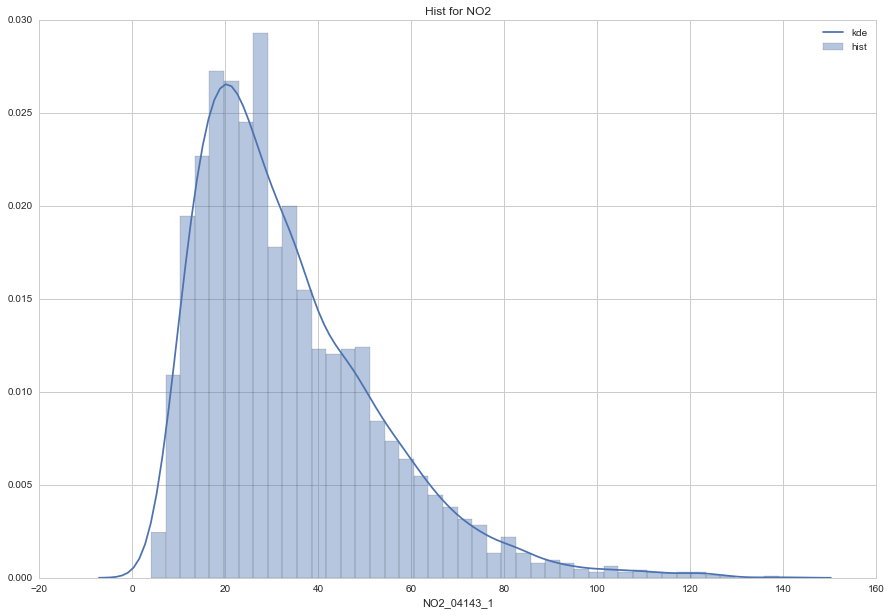

In [7]:
plt.figure(figsize=(15,10))
plt.title('Hist for '+Object)
data = Ytrain[ Object +'_04143_'+ Hour]
sns.distplot(data, norm_hist=True,kde_kws={"label":"kde"},hist_kws={'label':'hist'})



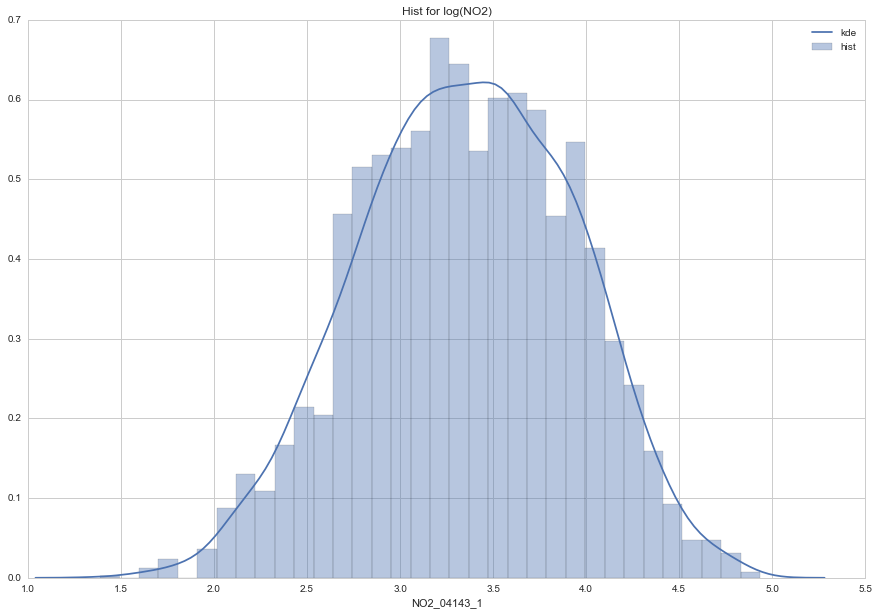

In [8]:
plt.figure(figsize=(15,10))
plt.title('Hist for log('+Object+")")
data = Ytrain[ Object +'_04143_'+ Hour]
data_log = np.log(data)
sns.distplot(data_log, norm_hist=True,kde_kws={"label":"kde"},hist_kws={'label':'hist'})

### III.1.1. Day


IndexSet : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


F_onewayResult(statistic=32.747686824936054, pvalue=9.8670065524514968e-39)

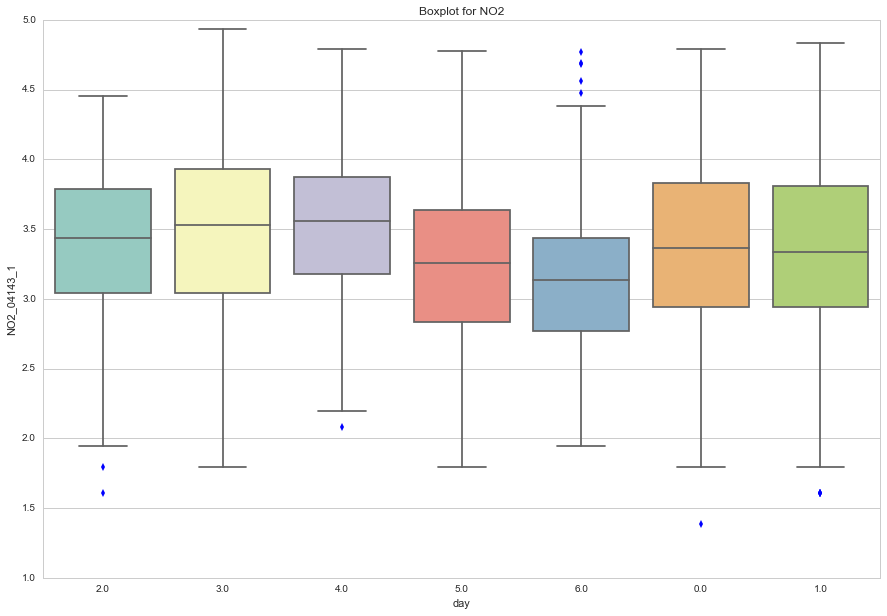

In [10]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.day,data_log,palette="Set3")
var = 'day'
MyAnova(Xtrain,data_log,var)

### III.1.2. Hour


IndexSet : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


F_onewayResult(statistic=27.216688516790612, pvalue=1.5485748865418794e-108)

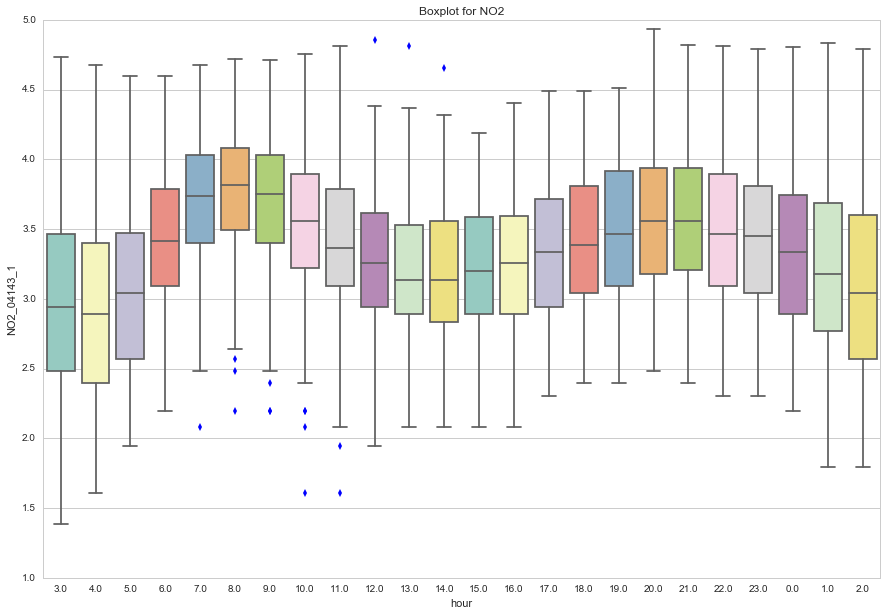

In [27]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.hour,data_log,palette="Set3")
var = 'hour'
MyAnova(Xtrain,data_log,var)

### III.1.3. isPublicHollyday


IndexSet : [0.0, 1.0]


F_onewayResult(statistic=34.707881739007298, pvalue=4.143856781548233e-09)

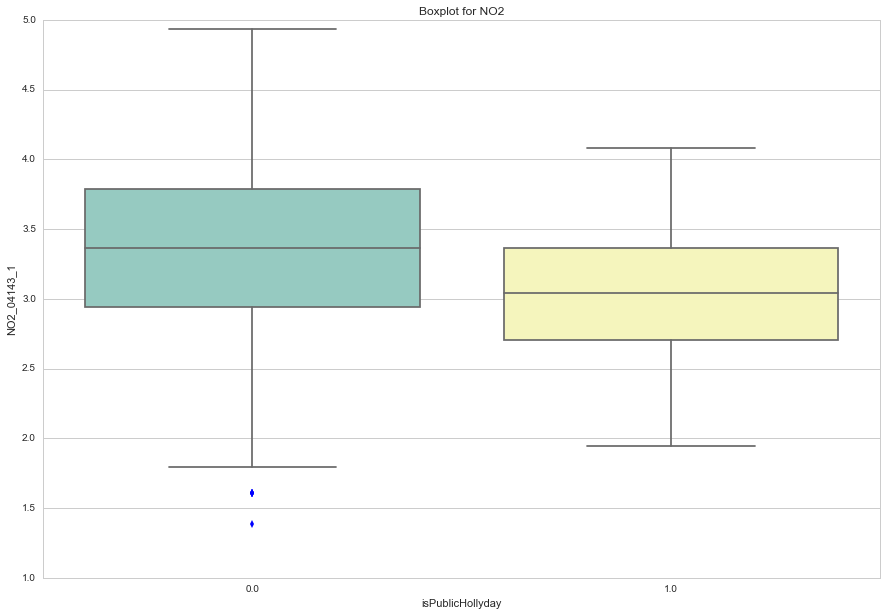

In [13]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.isPublicHollyday,data_log,palette="Set3")
var = 'isPublicHollyday'
MyAnova(Xtrain,data_log,var)

### III.1.4. isSaturday


IndexSet : [0.0, 1.0]


F_onewayResult(statistic=74.969844708162725, pvalue=6.8073380455404284e-18)

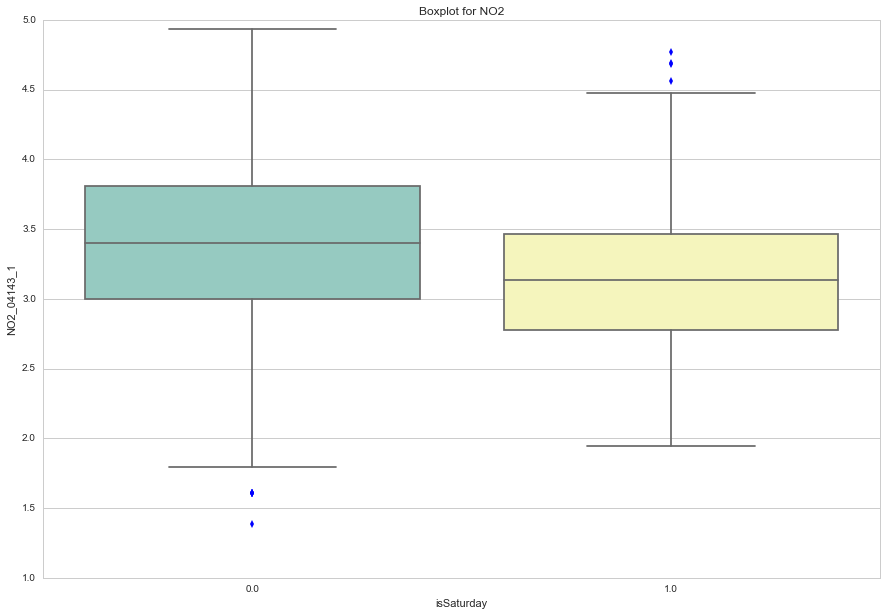

In [15]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.isSaturday,data_log,palette="Set3")
var = 'isSaturday'
MyAnova(Xtrain,data_log,var)

### III.1.5. isSundayOrPublicHollyday


IndexSet : [0.0, 1.0]


F_onewayResult(statistic=7.3221957541484493, pvalue=0.0068395001885959662)

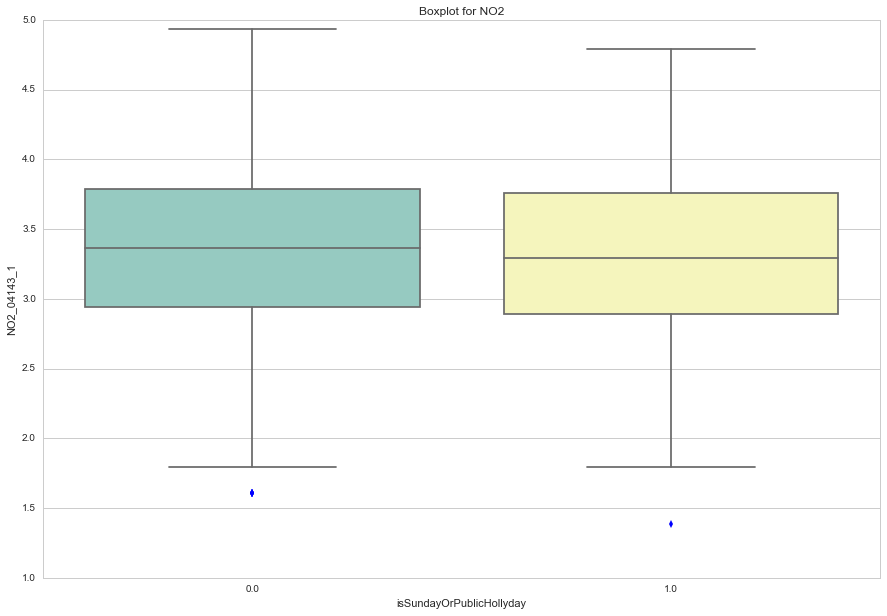

In [17]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.isSundayOrPublicHollyday,data_log,palette="Set3")
var = 'isSundayOrPublicHollyday'
MyAnova(Xtrain,data_log,var)

### III.1.6. month


IndexSet : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


F_onewayResult(statistic=147.29483505989739, pvalue=6.1852290860221257e-218)

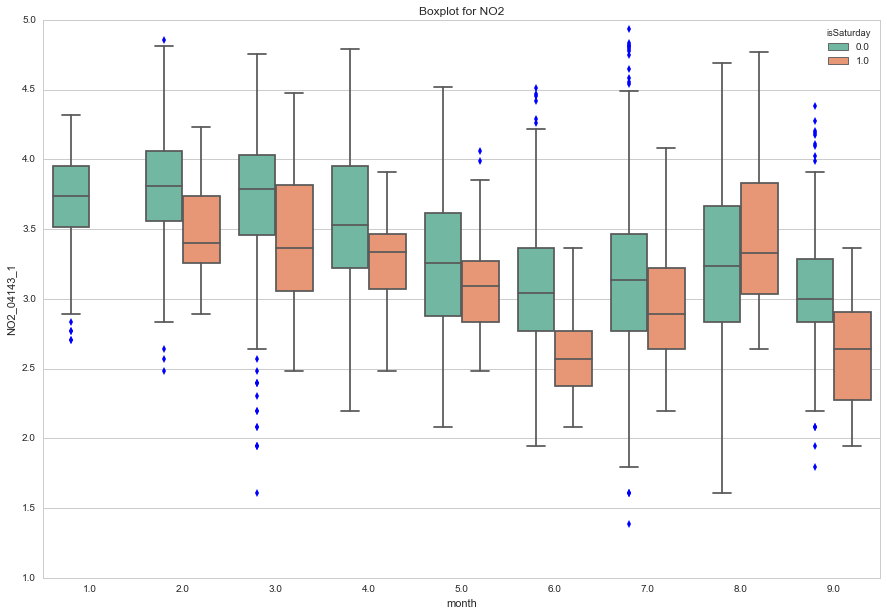

In [23]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.month,data_log,hue=Xtrain.isSaturday,palette="Set2")
var = 'month'
MyAnova(Xtrain,data_log,var)

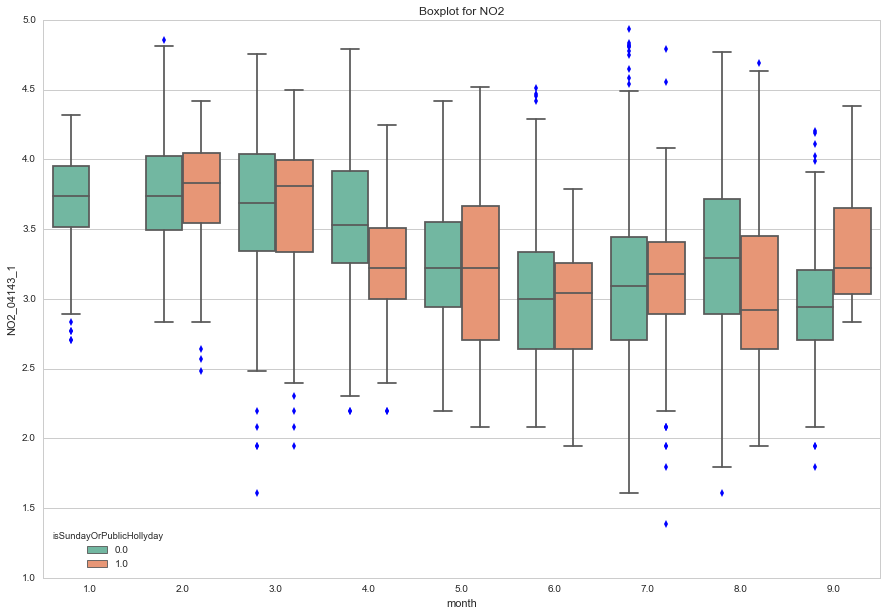

In [24]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.month,data_log,hue=Xtrain.isSundayOrPublicHollyday,palette="Set2")

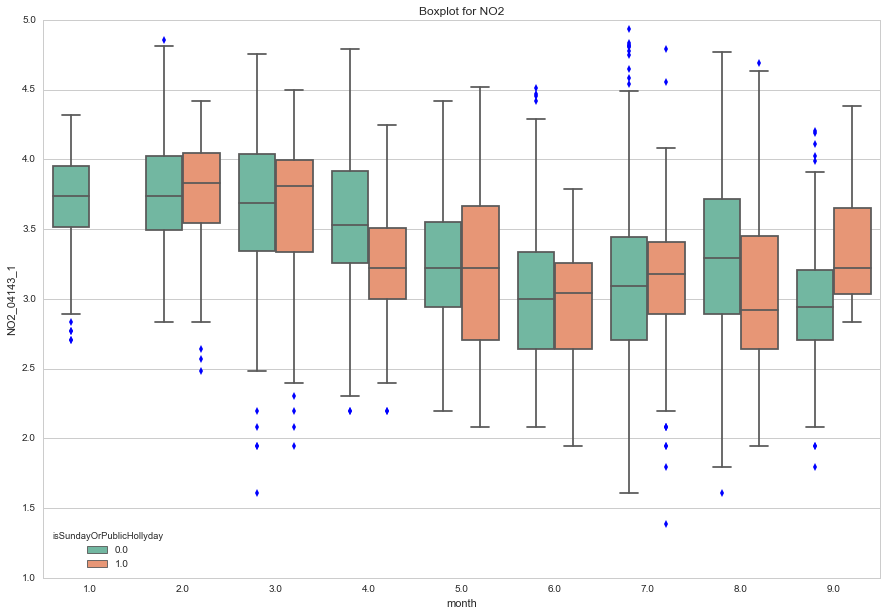

In [25]:
plt.figure(figsize=(15,10))
plt.title('Boxplot for '+Object)
sns.boxplot(Xtrain.month,data_log,hue=Xtrain.isSundayOrPublicHollyday,palette="Set2")

## III.2 variables météo : cloudCover, dewPoint, humidity, precipIntensity, precipProbability, pressure, sunPower, temperature

#####codes sur R

X_other=read.csv('Xothertrain.csv',header=T)

X=as.matrix(X_other)

Y_other=read.csv('Yothertrain.csv',header=T)

Y=as.matrix(Y_other)

modelNO2_1=lm(Y_other[,1]~X,constant=TRUE, output=TRUE)

summary(modelNO2_1)

#####codes sur R

On a décidé de prendre les variables XPrecipIntensity_04143 et XPrecipProbability_04143.

## III.3 variables de type vent : windBearingcos, windBearingsin, windSpeed

On note l'angle de windBearing $\theta$, et l'angle de la direction de station que l'on veut prédire $\alpha$.

$$windSpeed \times cos(\alpha - \theta) = windSpeed \times cos(\theta)cos(\alpha) + windSpeed \times sin(\theta)sin(\alpha)$$

Puisque on ne sait rien sur les informations géographique des stations, i.e. sur $\alpha$, on conserve tous les trois variables.

## III.4 variables de concentration : NO2, O3, PM2_5,  PM10

On ne considère que la variable à expliquée. i.e. Pour NO2, On n'utilise que NO2 comme variable de concentration.

# IV Modèle LASSO

### Désigne de l'ensemble d'apprentissage et l'ensemble de test

In [28]:
var = 'NO2-is-day-month-windB-XPrecipIntensity_04143-XPrecipProbability_04143'
objet_predict = "NO2"
X_train = pd.get_dummies(DataSample(X_train_train,var))
#X_train = X_train_train.iloc[:,1:]
Y_train = DataSample(Y_train_train,objet_predict).values

X_test = pd.get_dummies(DataSample(X_train_test,var))
#X_test = X_train_test.iloc[:,1:]
Y_test = DataSample(Y_train_test,objet_predict).values

In [29]:
hour = 24
Y_hour_train = Y_train[:,hour-1]
Y_hour_test = Y_test[:,hour-1]

clf = linear_model.LassoCV()
clf.fit(X_train.values,Y_hour_train)

a=pd.Series([int(clf.coef_[i]!=0) for i in range(len(clf.coef_))])

X_lasso_train = X_train.loc[:,a.values != 0]

X_lasso_test = X_test.loc[:,a.values != 0]


print "The hour(after) : +", hour,"h"
print "The number of variables(original) :", np.shape(X_train)[1]
print "The number of variables(selected by lasso) :", np.shape(X_lasso_train)[1],"\n"

lm_lasso = linear_model.LinearRegression()
lm_lasso.fit(X_lasso_train,Y_hour_train)
MSE = np.mean((Y_hour_test - lm_lasso.predict(X_lasso_test)) ** 2)
R2 = lm_lasso.score(X_lasso_test,Y_hour_test)
R2_adjusted = 1-(1-R2)*(len(X_test-1))/float(len(X_test)- np.shape(X_train)[1]-1)
print 'MSE(gauss-lasso) = ' + str(MSE) 
print 'R2(gauss-lasso) = ' + str(R2) 
print 'R2_adjusted(gauss-lasso) = ' + str(R2_adjusted) +'\n'

MSE = np.mean((Y_hour_test - clf.predict(X_test)) ** 2)
R2 = clf.score(X_test,Y_hour_test)
R2_adjusted = 1-(1-R2)*(len(X_test-1))/float(len(X_test)- np.shape(X_train)[1]-1)
print 'MSE(lasso) = ' + str(MSE) 
print 'R2(lasso) = ' + str(R2) 
print 'R2_adjusted(lasso) = ' + str(R2_adjusted) +'\n'



//anaconda/lib/python2.7/site-packages/sklearn/linear_model/base.py:424: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if precompute == 'auto':
//anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


The hour(after) : + 24 h
The number of variables(original) : 1961
The number of variables(selected by lasso) : 73 

MSE(gauss-lasso) = 215.820813542
R2(gauss-lasso) = 0.25988801489
R2_adjusted(gauss-lasso) = 1.80139514311

MSE(lasso) = 190.37862517
R2(lasso) = 0.347136636708
R2_adjusted(lasso) = 1.70692211312



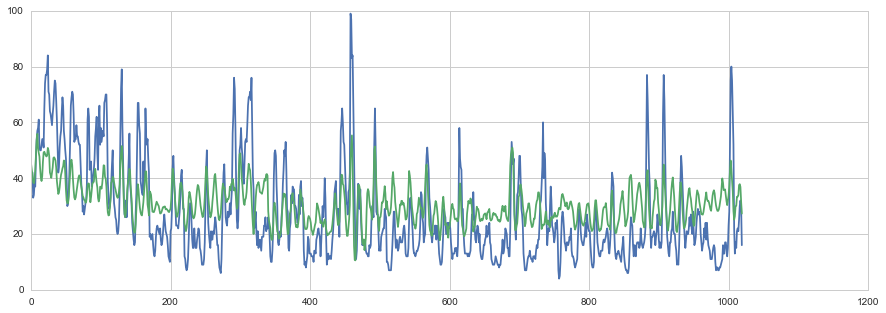

In [30]:
plt.figure(figsize = [15,5])
plt.plot(Y_hour_test)
plt.plot(clf.predict(X_test))

# V Regression MLP

### Désigne de l'ensemble d'apprentissage et l'ensemble de test

In [32]:
var = 'NO2-is-day-month-wind-XPrecipIntensity_04143-XPrecipProbability_04143'
objet_predict = "NO2"
X_train = pd.get_dummies(DataSample(X_train_train,var)).values
#X_train = X_train_train.iloc[:,1:]
Y_train = DataSample(Y_train_train,objet_predict).values

X_test = pd.get_dummies(DataSample(X_train_test,var)).values
#X_test = X_train_test.iloc[:,1:]
Y_test = DataSample(Y_train_test,objet_predict).values

### MLP (totalement connecté)

In [33]:
def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

def logistic(x):
    return 1/(1 + np.exp(-x))

def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))
def linear(x):
    return x/300.0
def linear_deriv(x):
    return np.float64(1/300.0)

class NeuralNetwork:
    def __init__(self, layers, activation='tanh'):
        """
        :param layers: A list containing the number of units in each layer.
        Should be at least two values
        :param activation: The activation function to be used. Can be
        "logistic" or "tanh"
        """
        if activation == 'logistic':
            self.activation = logistic
            self.activation_deriv = logistic_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_deriv = tanh_deriv
        elif activation == 'linear':
            self.activation = linear
            self.activation_deriv = linear_deriv

        self.weights = []
        for i in range(1, len(layers) - 1):
            self.weights.append((2*np.random.random((layers[i - 1] + 1, layers[i]
                                + 1))-1)*0.25)
        self.weights.append((2*np.random.random((layers[i] + 1, layers[i +
                            1]))-1)*0.25)
    def fit(self, X, y, learning_rate=0.2, epochs=1000):
        X = np.atleast_2d(X)
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, 0:-1] = X  # adding the bias unit to the input layer
        X = temp
        y = np.array(y)

        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                a.append(self.activation(np.dot(a[l], self.weights[l])))
            error = y[i] - a[-1]
            deltas = [error * self.activation_deriv(a[-1])]
           

            for l in range(len(a) - 2, 0, -1): # we need to begin at the second to last layer
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_deriv(a[l]))
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)
    def predict(self, x):
        x = np.array(x)
        temp = np.ones(x.shape[0]+1)
        temp[0:-1] = x
        a = temp
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))

        return a

In [34]:
hour = 24
Y_hour_train = Y_train[:,hour-1]
Y_hour_test = Y_test[:,hour-1]

In [35]:
nn = NeuralNetwork([np.shape(X_train)[1],200,1], 'linear')


nn.fit(X_train, Y_hour_train,learning_rate=0.05,epochs=6000)


MSE = 0 

for i in range(len(Y_hour_test)):
    MSE += (Y_hour_test[i] - nn.predict(X_test[i])) ** 2
print 'MSE(MLP) :', MSE/float(len(Y_hour_test))



MSE(MLP) : [ 166.85874629]


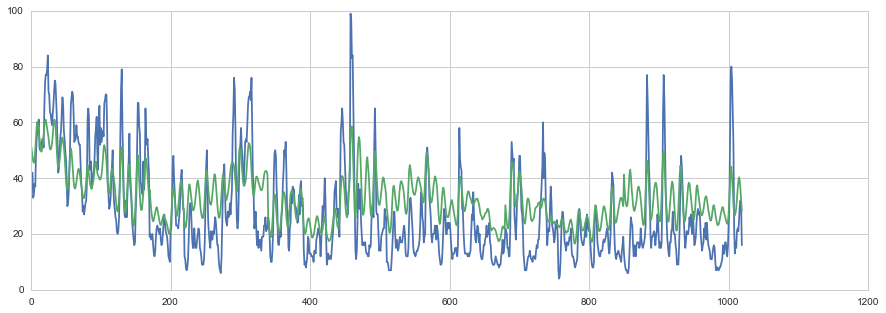

In [36]:
plt.figure(figsize = [15,5])
plt.plot(Y_hour_test)
plt.plot([nn.predict(X_test[id]) for id in range(len(Y_hour_test))])

# VI Modèle Final avec MLP

### NO2

In [ ]:
MSE_NO2 = 0 


var = 'NO2-is-day-month-wind-XPrecipIntensity_04143-XPrecipProbability_04143'
objet_predict = "NO2"

X_train = pd.get_dummies(DataSample(X_train_train,var)).values
#X_train = X_train_train.iloc[:,1:]
Y_train = DataSample(Y_train_train,objet_predict).values

X_test = pd.get_dummies(DataSample(X_train_test,var)).values
#X_test = X_train_test.iloc[:,1:]
Y_test = DataSample(Y_train_test,objet_predict).values


for hour in range(24):
    Y_hour_train = Y_train[:,hour]
    Y_hour_test = Y_test[:,hour]

    nn = NeuralNetwork([np.shape(X_train)[1],110,1], 'linear')
    nn.fit(X_train, Y_hour_train,learning_rate=0.05,epochs=6000)

    for i in range(len(Y_hour_test)):
        MSE_NO2 += (Y_hour_test[i] - nn.predict(X_test[i])) ** 2


### O3

In [ ]:
MSE_O3 = 0 


var = 'O3-is-day-month-wind-XPrecipIntensity_04143-XPrecipProbability_04143'
objet_predict = "O3"

X_train = pd.get_dummies(DataSample(X_train_train,var)).values
#X_train = X_train_train.iloc[:,1:]
Y_train = DataSample(Y_train_train,objet_predict).values

X_test = pd.get_dummies(DataSample(X_train_test,var)).values
#X_test = X_train_test.iloc[:,1:]
Y_test = DataSample(Y_train_test,objet_predict).values


for hour in range(24):
    Y_hour_train = Y_train[:,hour]
    Y_hour_test = Y_test[:,hour]

    nn = NeuralNetwork([np.shape(X_train)[1],110,1], 'linear')
    nn.fit(X_train, Y_hour_train,learning_rate=0.05,epochs=6000)

    for i in range(len(Y_hour_test)):
        MSE_O3 += (Y_hour_test[i] - nn.predict(X_test[i])) ** 2

### PM2.5

In [ ]:
MSE_PM2_5 = 0 


var = 'PM2-is-day-month-wind-XPrecipIntensity_04143-XPrecipProbability_04143'
objet_predict = "PM2"

X_train = pd.get_dummies(DataSample(X_train_train,var)).values
#X_train = X_train_train.iloc[:,1:]
Y_train = DataSample(Y_train_train,objet_predict).values

X_test = pd.get_dummies(DataSample(X_train_test,var)).values
#X_test = X_train_test.iloc[:,1:]
Y_test = DataSample(Y_train_test,objet_predict).values


for hour in range(24):
    Y_hour_train = Y_train[:,hour]
    Y_hour_test = Y_test[:,hour]

    nn = NeuralNetwork([np.shape(X_train)[1],110,1], 'linear')
    nn.fit(X_train, Y_hour_train,learning_rate=0.05,epochs=6000)

    for i in range(len(Y_hour_test)):
        MSE_PM2_5 += (Y_hour_test[i] - nn.predict(X_test[i])) ** 2

### PM10

In [ ]:
MSE_PM10 = 0 


var = 'PM10-is-day-month-wind-XPrecipIntensity_04143-XPrecipProbability_04143'
objet_predict = "PM10"

X_train = pd.get_dummies(DataSample(X_train_train,var)).values
#X_train = X_train_train.iloc[:,1:]
Y_train = DataSample(Y_train_train,objet_predict).values

X_test = pd.get_dummies(DataSample(X_train_test,var)).values
#X_test = X_train_test.iloc[:,1:]
Y_test = DataSample(Y_train_test,objet_predict).values


for hour in range(24):
    Y_hour_train = Y_train[:,hour]
    Y_hour_test = Y_test[:,hour]

    nn = NeuralNetwork([np.shape(X_train)[1],110,1], 'linear')
    nn.fit(X_train, Y_hour_train,learning_rate=0.05,epochs=6000)

    for i in range(len(Y_hour_test)):
        MSE_PM10 += (Y_hour_test[i] - nn.predict(X_test[i])) ** 2



## Conclusion

In [ ]:
MSE = MSE_NO2 + MSE_O3 + MSE_PM2_5 + MSE_PM10
MSE = MSE/(float(len(Y_hour_test)))
print "MSE total :",MSE